# Exercício 1

![alt text](enunciado_1.png)

![alt text](fluxograma_1.png)

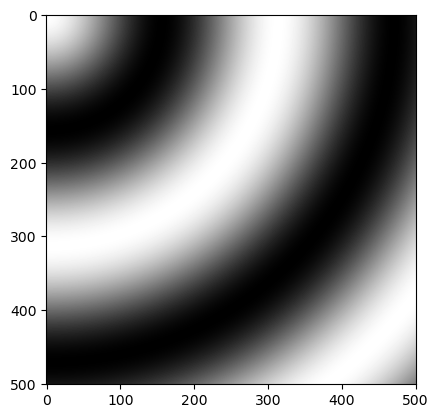

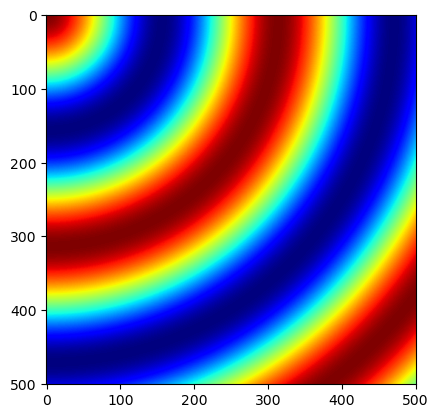

In [11]:
import pylab as pl
from numpy import loadtxt

# Obter os dados do arquivo circular.txt
data = loadtxt("circular.txt",float)

# Exibir os dados como uma imagem
pl.imshow(data)
pl.gray()
pl.show()

pl.imshow(data)
pl.jet()
pl.show()



# Exercício 2

![alt text](enunciado2.1.png)

![alt text](enunciado2.2.png)

![alt text](enunciado2.3.png)

![alt text](fluxograma_2.png)

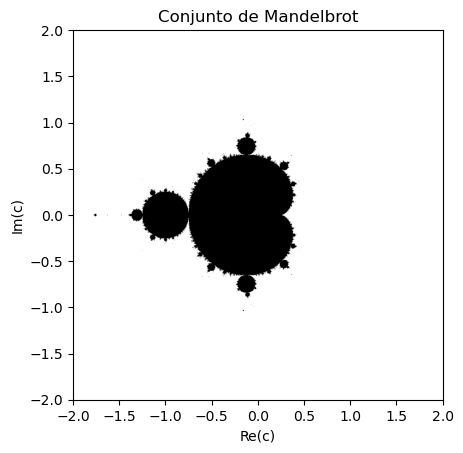

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#Função que verifica se um ponto c está no conjunto de Mandelbrot
#Faz 100 iterações para a verificação 
def mandelbrot(c, max_iter=100):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return False  # Fora do conjunto
        z = z**2 + c
    return True  # Dentro do conjunto

# Função para gerar o grid do conjunto de Mandelbrot
def generate_mandelbrot(N=1000, x_min=-2, x_max=2, y_min=-2, y_max=2):
    x = np.linspace(x_min, x_max, N)
    y = np.linspace(y_min, y_max, N)
    mandelbrot_grid = np.zeros((N, N), dtype=bool)
    
    for i in range(N):
        for j in range(N):
            c = complex(x[i], y[j]) 
            mandelbrot_grid[j, i] = mandelbrot(c) # Verifica se c está no conjunto de Mandelbrot
     
    return mandelbrot_grid # Retorna a grade do conjunto de Mandelbrot

# Parâmetros
N = 1000  # Aumente para melhor resolução (ex: 500 ou 1000)

# Gerar e plotar
mandelbrot_set = generate_mandelbrot(N)
plt.imshow(mandelbrot_set, cmap='binary', extent=[-2, 2, -2, 2])
plt.title("Conjunto de Mandelbrot")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.show()

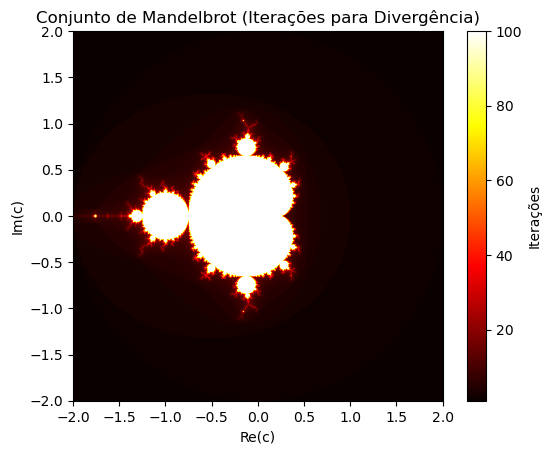

In [ ]:
# Função para gerar o conjunto de Mandelbrot com cores baseadas no número de iterações até a divergência
def mandelbrot_color(c, max_iter=100):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n  # Retorna o número de iterações
        z = z**2 + c
    return max_iter  # Nunca divergiu

# Função para gerar o grid do conjunto de Mandelbrot com cores
def generate_mandelbrot_color(N=100, max_iter=100):
    x = np.linspace(-2, 2, N)
    y = np.linspace(-2, 2, N)
    iterations = np.zeros((N, N))
    
    for i in range(N):
        for j in range(N):
            c = complex(x[i], y[j])
            iterations[j, i] = mandelbrot_color(c, max_iter) # Verifica o número de iterações até a divergência
    
    return iterations

# Gerar e plotar versão colorida
mandelbrot_iter = generate_mandelbrot_color(N)
plt.imshow(mandelbrot_iter, cmap='hot', extent=[-2, 2, -2, 2])
plt.title("Conjunto de Mandelbrot (Iterações para Divergência)")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.colorbar(label="Iterações")
plt.show()

# Exercício 3

3 - Fluxograma

INICIO

Avaliação inicial dos dados
Limpeza (se necerrário)
Criar os gráficos

Listagem dos dados de emissão da Carteira de Trabalho e Previdência Social - CTPS Dados 2021
https://docs.google.com/spreadsheets/d/1SCUSAbWc8OaVwQ-jeTK8L6bbLQm-nudovdwWlElx8K4/edit?gid=257100083#gid=257100083



![](enunciado_3.png)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

# Carregar os dados
df_original = pd.read_excel('Dados_CTPS_2021.xlsx')

df = df_original.copy()



C:\Users\vinic\AppData\Local\Temp\ipykernel_8120\2726896446.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


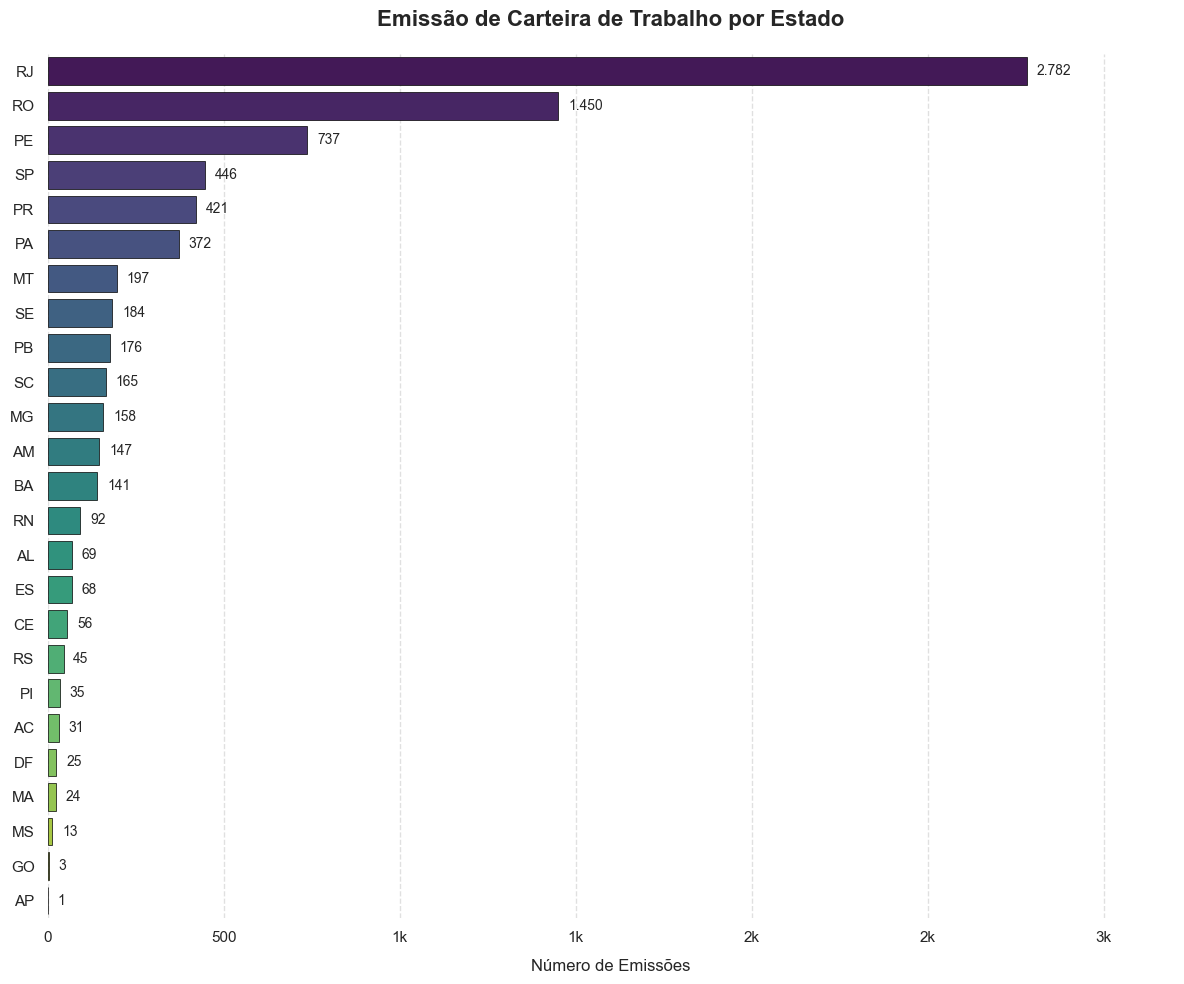

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

df = df[df["Tipo Protocolo"] == "1ª Via"]  # Filtrar apenas registros de PRIMEIRA VIA

# Configuração do estilo

sns.set_theme(style="white")

# Preparação dos dados
contagem_estados = df['Sigla UF Órgão'].value_counts().reset_index()
contagem_estados.columns = ['Estado', 'Quantidade']
contagem_estados = contagem_estados.sort_values('Quantidade', ascending=False)

# Paleta de cores personalizada
cores = sns.color_palette("viridis", n_colors=len(contagem_estados))

# Criação da figura
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    x='Quantidade', 
    y='Estado', 
    data=contagem_estados, 
    palette=cores,
    edgecolor='black',
    linewidth=0.5
)

# Adicionando valores nas barras
for i, (valor, estado) in enumerate(zip(contagem_estados['Quantidade'], contagem_estados['Estado'])):
    ax.text(valor + max(contagem_estados['Quantidade'])*0.01, 
            i, 
            f'{valor:,}'.replace(',', '.'), 
            ha='left', 
            va='center',
            fontsize=10)

# Formatação do eixo x para milhares
def formatar_milhares(x, pos):
    return f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'

ax.xaxis.set_major_formatter(FuncFormatter(formatar_milhares))

# Títulos e labels
plt.title('Emissão de Carteira de Trabalho por Estado', 
          fontsize=16, 
          pad=20, 
          fontweight='bold')
plt.xlabel('Número de Emissões', fontsize=12, labelpad=10)
plt.ylabel('', fontsize=12)
plt.xlim(0, max(contagem_estados['Quantidade']) * 1.15)

# Adicionando linhas de grid verticais
ax.xaxis.grid(True, linestyle='--', alpha=0.6)

# Removendo bordas
sns.despine(left=True, bottom=True)

# Ajustes finais
plt.tight_layout()
plt.show()

OBS: Filtrei com somente 1 via

C:\Users\vinic\AppData\Local\Temp\ipykernel_10616\498550616.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sexo', y='Idade', data=df, palette='coolwarm')


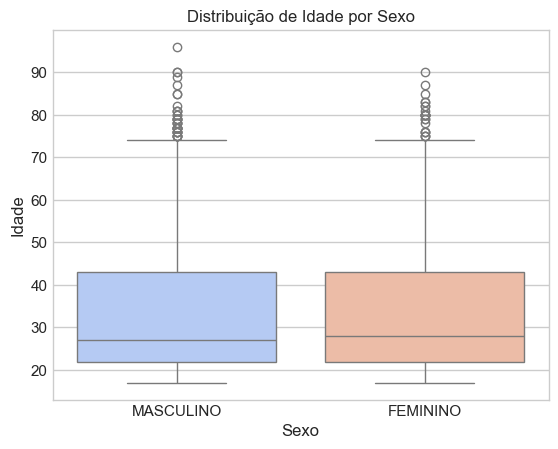

idade maxima: 96
idade minima: 17


In [51]:
df = df_original.copy()

# Converter data de nascimento para idade
df['Idade'] = (pd.to_datetime('today') - pd.to_datetime(df['Data Nascimento'])).dt.days // 365

# Boxplot por sexo
sns.boxplot(x='Sexo', y='Idade', data=df, palette='coolwarm')
plt.title('Distribuição de Idade por Sexo')
plt.show()

print("idade maxima:", df['Idade'].max())
print("idade minima:", df['Idade'].min())

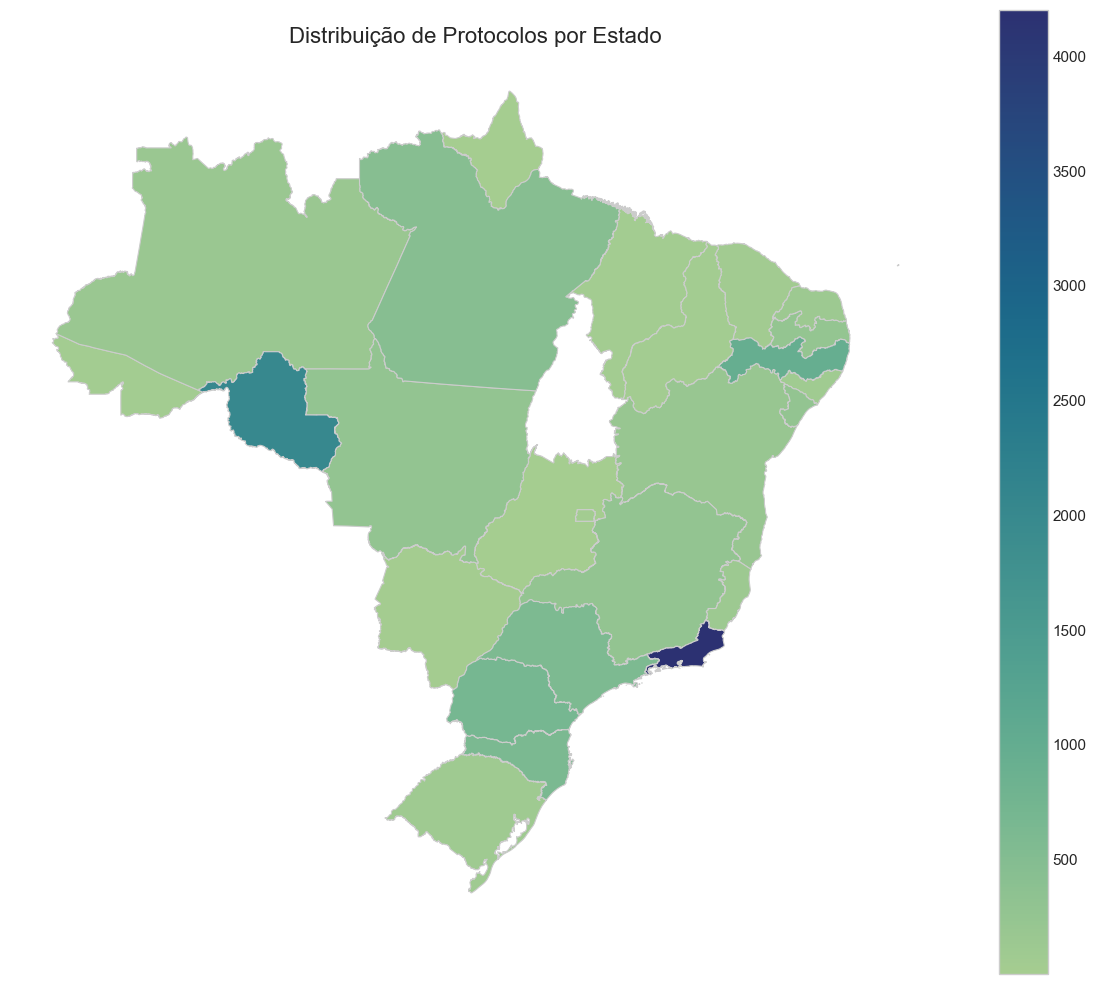

In [56]:
df = df_original.copy()

# Baixar shapefile do Brasil
brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Preparar dados
dados_mapa = df['Sigla UF Órgão'].value_counts().reset_index()
dados_mapa.columns = ['sigla', 'quantidade']

# Merge com o mapa
brasil = brasil.merge(dados_mapa, left_on='sigla', right_on='sigla', how='left')

# Plotar
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
brasil.plot(column='quantidade', cmap='crest', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Distribuição de Protocolos por Estado', fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

Todos os protocolos

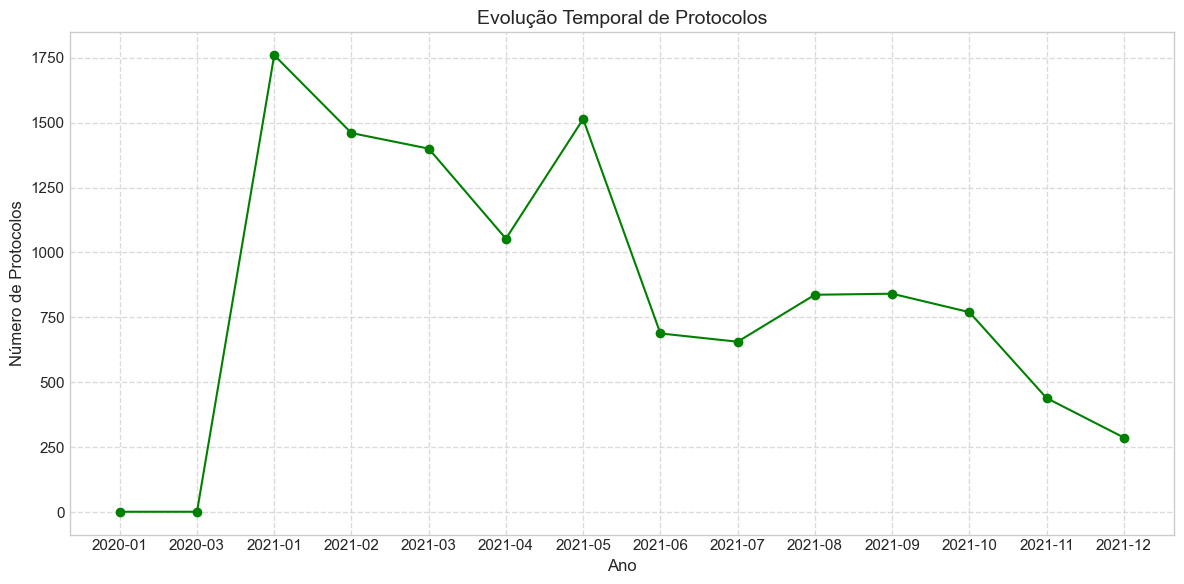

In [59]:
# Agrupar por mes
temp = df.groupby('Data Emissão').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.plot(temp['Data Emissão'], temp['count'], marker='o', linestyle='-', color='green')
plt.title('Evolução Temporal de Protocolos', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Protocolos', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

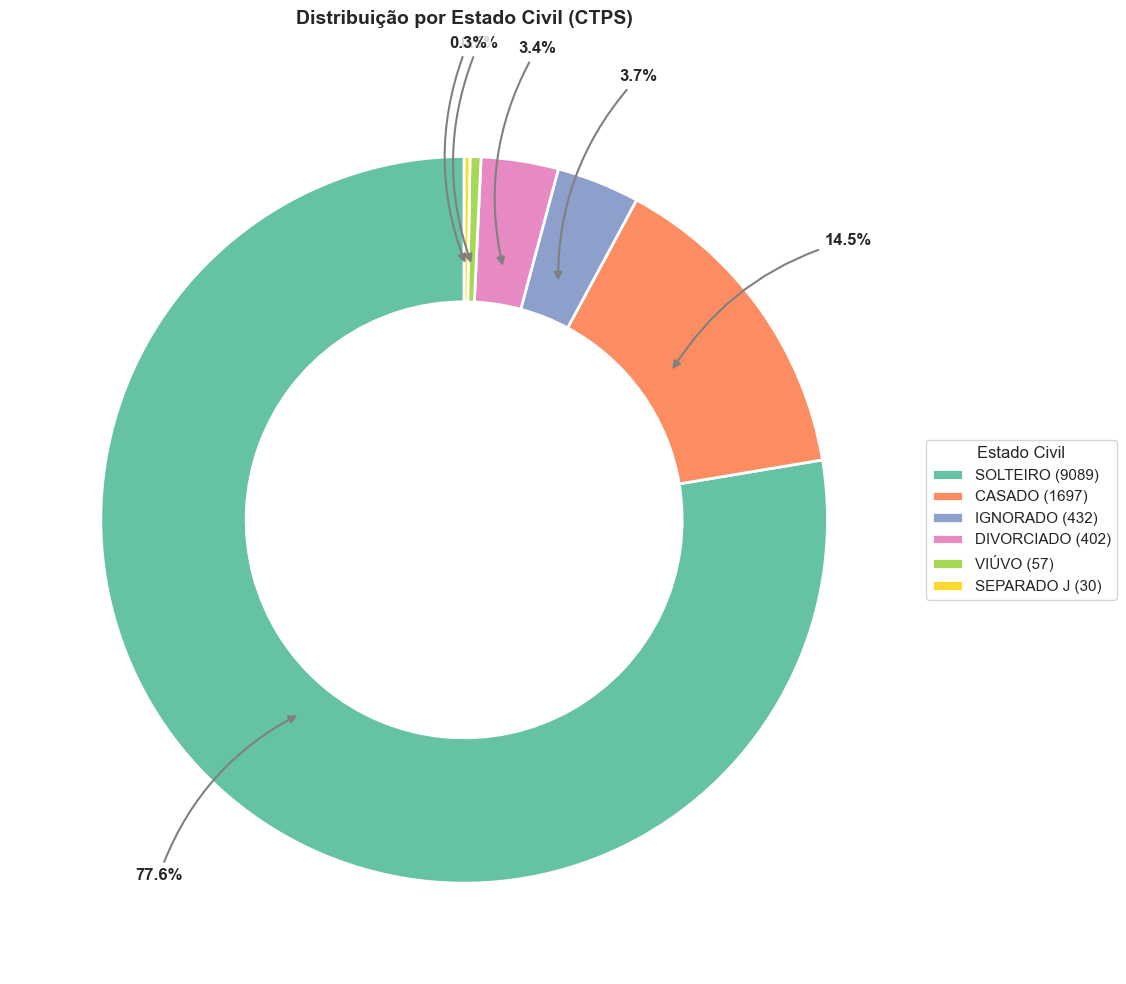

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch
import numpy as np

# Dados
contagem = df['Estado Civil'].value_counts()

# Cores
cores = sns.color_palette('Set2', len(contagem))

# Figura
fig, ax = plt.subplots(figsize=(12, 10), dpi=100)

# Donut
wedges, texts, autotexts = ax.pie(
    contagem,
    labels=None,  # Removemos os labels laterais
    autopct='',
    pctdistance=0.8,
    colors=cores,
    startangle=90,
    wedgeprops={'width':0.4, 'edgecolor':'white', 'linewidth':2}
)

# Círculo central
centre_circle = plt.Circle((0,0), 0.3, fc='white')
ax.add_artist(centre_circle)

# Anotações com setas
for i, (wedge, porcentagem) in enumerate(zip(wedges, contagem/contagem.sum()*100)):
    ang = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    # Posição da seta
    connectionstyle = f"arc3,rad={0.2 if x > 0 else -0.2}"
    ax.annotate(
        f'{porcentagem:.1f}%',
        xy=(x*0.7, y*0.7),
        xytext=(1.3*x, 1.3*y),
        textcoords='data',
        arrowprops=dict(
            arrowstyle='-|>',
            connectionstyle=connectionstyle,
            color='gray',
            lw=1.5
        ),
        ha='center',
        fontsize=12,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8)
    )

# Legenda
ax.legend(
    wedges,
    [f'{l} ({v})' for l, v in zip(contagem.index, contagem)],
    title='Estado Civil',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)

# Título
plt.title('Distribuição por Estado Civil (CTPS)', pad=30, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()